## In this file, we are analysisng the tweets from Twitter related to EWR airport to find out the public sentimnet about delays at EWR airport.

In [1]:
# installing snscrape library to retrieve tweets from Twittter

pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 3.7 MB/s eta 0:00:00


In [2]:
# importing necessary modules

import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter

In [ ]:
# Getting tweets from Twitter using following key words

query1="( EWR flight cancellations OR EWR customer service) until:2022-12-30 since:2022-01-01"
query2="( EWR security checkpoints OR EWR baggage claims) until:2022-12-30 since:2022-01-01"
query3="( Newark Liberty International Airport OR EWR) until:2022-12-30 since:2022-01-01"
query4="( EWR delay OR EWR over crowding) until:2022-12-30 since:2022-01-01"
query5="( EWR long wait times OR EWR weather) until:2022-12-30 since:2022-01-01"
query6="( EWR traffic control issue) until:2022-12-30 since:2022-01-01"
tweets=[]
limit=10000

for tweet in sntwitter.TwitterHashtagScraper(query1).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])

for tweet in sntwitter.TwitterHashtagScraper(query2).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])

for tweet in sntwitter.TwitterHashtagScraper(query3).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])

for tweet in sntwitter.TwitterHashtagScraper(query4).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])

for tweet in sntwitter.TwitterHashtagScraper(query5).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])

for tweet in sntwitter.TwitterHashtagScraper(query6).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])

# converting the tweets into a dataframe and then saving it as a .csv file

df=pd.DataFrame(tweets, columns=['date','tweet'])
df.to_csv('tweetsall.csv')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# creating dataframe named 'data' with all the tweets
 
data=pd.read_csv('tweets1.csv')
data.head()

,date,tweet
0,2022-12-29 07:04:00+00:00,"@united @BoeingAirplanes I have incurred losses due to the delay of the flight by 6 hours on 24th December, 2022 from RDU to EWR expected to depart at 5:46 pm. However, flight went on runway and then again took us to the gate and made us wait at the airport without any clarification. @united @JoeBiden"
1,2022-12-29 03:07:16+00:00,@mentack USA is a lot larger than Europe You can fly SFO to EWR in 5 hours. High speed rail would still take a day. And rail is subject to weather delays also.
2,2022-12-28 22:09:54+00:00,@mrdenny I think most airline computer systems have not been modified since they first bought a mainframe.\n\nUA could not get me on a flight to London from IAD instead of going to EWR when we where delayed. Because SAS had already re-booked me AND checked me in. 27 hours delay bcs of it
3,2022-12-28 14:30:34+00:00,@SpiritAirlines first and last time using this airline. Spent a small fortune on tickets for 5 passengers from EWR to MCO. Flight was supposed to depart at 6am and arrive at 8:59am. Two delays later and now it's scheduled for departure at 12:45pm with an arrival time of 3:44pm.
4,2022-12-28 03:35:23+00:00,"@staralliance your airline @united is closing out the year with record delays. You can't blame this on the weather. In the past week I've never received so many ""your flight has been delayed"" #tistheseason #ewr #UnitedAirlines #staralliance #FlightAware https://t.co/9q4CX8QXDe"


In [ ]:
data.shape

(2144, 2)

In [ ]:
# displaying sample tweet

data['tweet'][5]

'Due to TM Initiatives:DSP:VOL Gate Hold and Taxi delays between 15-29 minutes and decreasing.  #EWR'

In [ ]:
# importing necessary modules

import tweepy
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# importing nltk module for tweets pre-processing

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Preprocessing the tweets
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing URLs
    text = re.sub(r'https', '', text)
    # Removing mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenizing text
    tokens = nltk.word_tokenize(text)
    # Removing stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatizing tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Joining tokens into text
    text = ' '.join(tokens)
    return text

In [ ]:
# Creating a list of preprocessed tweets
preprocessed_tweets = []
for twt in data['tweet']:
    preprocessed_tweet = preprocess_text(twt)
    preprocessed_tweets.append(preprocessed_tweet)

In [ ]:
#printing the first 10 preprocessed clean tweets
#we can see that #hashtag and url is removed
preprocessed_tweets[5]

'due tm initiativesdspvol gate hold taxi delay 1529 minute decreasing'

In [ ]:
# Performing sentiment analysis on the preprocessed tweets
sentiments = []
positive_tweets = 0
negative_tweets = 0
neutral_tweets = 0
i=0
for twt in preprocessed_tweets:
    blob = TextBlob(twt)
    sentiment_score = blob.sentiment.polarity
    data.loc[i, 'sentiment score']=sentiment_score
    i=i+1
    if sentiment_score > 0:
        sentiment = 'positive'
        positive_tweets += 1
    elif sentiment_score < 0:
        sentiment = 'negative'
        negative_tweets += 1
    else:
        sentiment = 'neutral'
        neutral_tweets += 1
    sentiments.append(sentiment)

In [ ]:
#printing the sentiments of the preprocessed tweets
sentiments[0:10]

['negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive']

## Sentiment Pie Chart

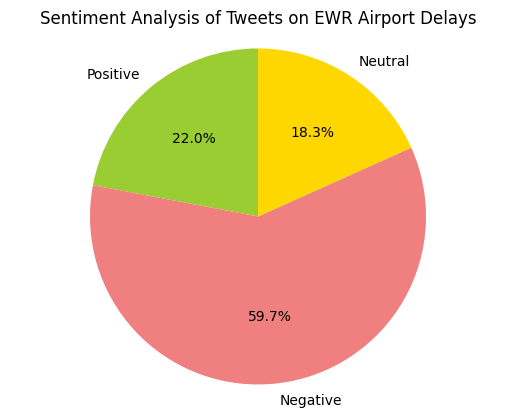

In [ ]:
# Creating a pie chart to visualize sentiment distribution of tweets on EWR airport

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_tweets, negative_tweets, neutral_tweets]
colors = ['yellowgreen', 'lightcoral', 'gold']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Analysis of Tweets on EWR Airport Delays')
plt.show()

In [ ]:
# adding 'sentimnet' column to dataframe

data['sentiment']=sentiments

In [ ]:
# adding 'processed tweet' column to dataframe

data['processed tweet']=preprocessed_tweets

In [ ]:
# displaying first five rows of dataframe

data.head()

,date,tweet,sentiment score,sentiment,processed tweet
0,2022-12-29 07:04:00+00:00,"@united @BoeingAirplanes I have incurred losses due to the delay of the flight by 6 hours on 24th December, 2022 from RDU to EWR expected to depart at 5:46 pm. However, flight went on runway and then again took us to the gate and made us wait at the airport without any clarification. @united @JoeBiden",-0.112500,negative,incurred loss due delay flight 6 hour 24th december 2022 rdu ewr expected depart 546 pm however flight went runway took u gate made u wait airport without clarification
1,2022-12-29 03:07:16+00:00,@mentack USA is a lot larger than Europe You can fly SFO to EWR in 5 hours. High speed rail would still take a day. And rail is subject to weather delays also.,0.198333,positive,usa lot larger europe fly sfo ewr 5 hour high speed rail would still take day rail subject weather delay also
2,2022-12-28 22:09:54+00:00,@mrdenny I think most airline computer systems have not been modified since they first bought a mainframe.\n\nUA could not get me on a flight to London from IAD instead of going to EWR when we where delayed. Because SAS had already re-booked me AND checked me in. 27 hours delay bcs of it,0.250000,positive,think airline computer system modified since first bought mainframe ua could get flight london iad instead going ewr delayed sa already rebooked checked 27 hour delay bcs
3,2022-12-28 14:30:34+00:00,@SpiritAirlines first and last time using this airline. Spent a small fortune on tickets for 5 passengers from EWR to MCO. Flight was supposed to depart at 6am and arrive at 8:59am. Two delays later and now it's scheduled for departure at 12:45pm with an arrival time of 3:44pm.,-0.020000,negative,first last time using airline spent small fortune ticket 5 passenger ewr mco flight supposed depart 6am arrive 859am two delay later scheduled departure 1245pm arrival time 344pm
4,2022-12-28 03:35:23+00:00,"@staralliance your airline @united is closing out the year with record delays. You can't blame this on the weather. In the past week I've never received so many ""your flight has been delayed"" #tistheseason #ewr #UnitedAirlines #staralliance #FlightAware https://t.co/9q4CX8QXDe",0.125000,positive,airline closing year record delay cant blame weather past week ive never received many flight delayed


In [ ]:
# displaying last five rows of datafrem

data.tail()

,date,tweet,sentiment score,sentiment,processed tweet
2139,2022-01-01 15:06:27+00:00,@JetBlue flight 890 SJU- EWR received email about 2 he delay last night. 10 am new alert on time depart 11:36. At the airport just on time to board and NO staff knows anything about the flight .,0.068182,positive,flight 890 sju ewr received email 2 delay last night 10 new alert time depart 1136 airport time board staff know anything flight
2140,2022-01-01 14:48:50+00:00,Due to TM Initiatives:MIT:VOL Gate Hold and Taxi delays between 31-45 minutes and increasing. #EWR,-0.125000,negative,due tm initiativesmitvol gate hold taxi delay 3145 minute increasing
2141,2022-01-01 14:23:49+00:00,Due to TM Initiatives:MIT:VOL Gate Hold and Taxi delays between 16-30 minutes and increasing. #EWR,-0.125000,negative,due tm initiativesmitvol gate hold taxi delay 1630 minute increasing
2142,2022-01-01 03:03:06+00:00,@united on UA 801 to Delhi from EWR. Flight is delayed. Flight has been fully boarded for at least 45 mts and we keep getting a message that previous plane arrived late. Let’s at least provide valid reasons for the delay,-0.266667,negative,ua 801 delhi ewr flight delayed flight fully boarded least 45 mt keep getting message previous plane arrived late let least provide valid reason delay
2143,2022-01-01 00:22:24+00:00,@united flight UA1778 EWR to ORD says delayed at gate C86 because an earlier delay impacted the planes arrival. It looks like #3701 arrived at gate B61 at 6:04. Last night a 15 min delay turned into 2 hrs. What’s actually happening?,0.000000,neutral,flight ua1778 ewr ord say delayed gate c86 earlier delay impacted plane arrival look like arrived gate b61 604 last night 15 min delay turned 2 hr whats actually happening


## Word Cloud of processed tweets

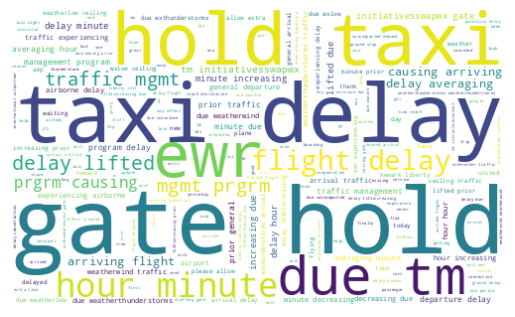

In [ ]:
# Plotting The Word Cloud of processed tweets

allWords = ' '.join( [twts for twts in data['processed tweet']])

wordcloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119, background_color='white'). generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

## USING GRIDSEARCH CV FOR LDA

In [ ]:
# importing necessary modules

import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV


In [ ]:
#using the CountVectorizer to convert the text into a matrix of token counts:
vectorizer2 = CountVectorizer(stop_words='english')
X = vectorizer2.fit_transform(data['processed tweet'])

In [ ]:
#Defining the LDA model and the parameter grid for GridSearchCV:

lda = LatentDirichletAllocation()

param_grid = {
    'n_components': [5, 10, 15],
    'learning_decay': [.5, .7, .9],
    'max_iter': [10, 50, 100]
}


In [ ]:
# Using GridSearchCV to search for the best hyperparameters:
grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5)
grid_search.fit(X)


GridSearchCV(cv=5, estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'max_iter': [10, 50, 100],
                         'n_components': [5, 10, 15]})

In [ ]:
# Printing the best hyperparameters and the corresponding score:
print('Best Hyperparameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)


Best Hyperparameters:  {'learning_decay': 0.5, 'max_iter': 100, 'n_components': 5}
Best Score:  -36040.01757756788


## Getting best parameters for LDA using GridsearchCV

In [ ]:
# Defining the number of topics and perform topic modeling using LDA
num_topics = 5
lda_model2 = LatentDirichletAllocation(n_components=num_topics, max_iter=100, learning_method='online', random_state=42,learning_decay=0.5)
lda_model2.fit(X)

LatentDirichletAllocation(learning_decay=0.5, learning_method='online',
                          max_iter=100, n_components=5, random_state=42)

## Topics modelled by LDA

In [ ]:
# Printing the top 10 terms for each topic
for idx, topic in enumerate(lda_model2.components_):
    print('Topic: ', idx)
    print(' '.join([vectorizer2.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]))

Topic:  0
delay program traffic management prior lifted land gt carrier business
Topic:  1
flight delay minute causing arriving traffic mgmt averaging prgrm hour
Topic:  2
delay gate minute hold taxi hour tm increasing initiativesswapwx general
Topic:  3
delay ewr newark amp airline international got service liberty currently
Topic:  4
delay ewr flight hour experiencing time arrival traffic airborne airport


In [ ]:
# printing the number of tweets topic wise and we can see that around 750 tweets are about Topic-2.

from collections import Counter
topic_counts = Counter(lda_model2.transform(X).argmax(axis=1))

for topic_num, count in sorted(topic_counts.items()):
    print(f"Topic {topic_num}: {count} tweets")


Topic 0: 220 tweets
Topic 1: 380 tweets
Topic 2: 750 tweets
Topic 3: 207 tweets
Topic 4: 587 tweets


In [ ]:
# finding out the sentiment score of each topic to find out whether that particular topic is Positive, Neagtive or Neutral. We can see that all the topics are Negative

tweets_by_topic = {}
for i, topic in enumerate(lda_model2.components_):
    topic_tweets = []
    for j in range(len(data)):
        topic_probs = lda_model2.transform(X[j])
        topic_index = np.argmax(topic_probs)
        if topic_index == i:
            topic_tweets.append(data['processed tweet'][j])
    tweets_by_topic[i] = topic_tweets
for topic_num, topic_tweets in tweets_by_topic.items():
    polarity = 0
    for tweet in topic_tweets:
        blob = TextBlob(tweet)
        polarity += blob.sentiment.polarity
    avg_polarity = polarity / len(topic_tweets)
    print(f"Topic {topic_num} sentiment: {avg_polarity}")

Topic 0 sentiment: -0.0002641676505312863
Topic 1 sentiment: -0.12327631578947366
Topic 2 sentiment: -0.0816817460317463
Topic 3 sentiment: 0.042983338550108725
Topic 4 sentiment: -0.03368566720994319
